In [10]:
from Bio import SeqIO
from Bio.SeqIO import AbiIO
import os

In [11]:
seq_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.seq']
seq_files

['25-Mn-fw-EM-28.seq',
 '25-Mn-re-EM-27.seq',
 '55-Mn-fw-EM-28.seq',
 '55-Mn-re-EM-27.seq',
 'no-Mn-fw-EM-28.seq',
 'no-Mn-re-EM-27.seq']

In [12]:
abi_files = [f for f in os.listdir(os.getcwd()) if f[-4:] == '.ab1']
abi_files

['25-Mn-fw-EM-28.ab1',
 '25-Mn-re-EM-27.ab1',
 '55-Mn-fw-EM-28.ab1',
 '55-Mn-re-EM-27.ab1',
 'no-Mn-fw-EM-28.ab1',
 'no-Mn-re-EM-27.ab1']

In [17]:
sequences = []
traces = []
for f in seq_files:
    sequences.append(SeqIO.read(f, 'fasta'))
    
sequences

[SeqRecord(seq=Seq('NNNNNNNNNACNANNNNTNGCTNGATTCTTTATGGATCTCACCTTGTTTCTACA...NNN', SingleLetterAlphabet()), id='25-Mn-fw-EM-28_E12.ab1', name='25-Mn-fw-EM-28_E12.ab1', description='25-Mn-fw-EM-28_E12.ab1', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNCTNNNNNNNTCCCTGTGTTTCACTGACCTCCTCAGGAGATAATAATACAT...NNN', SingleLetterAlphabet()), id='25-Mn-re-EM-27_F12.ab1', name='25-Mn-re-EM-27_F12.ab1', description='25-Mn-re-EM-27_F12.ab1', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNCCTNNNGNAGANAATAATACATTCACNTTGGTCTCANGGTGATTTCTG...NNN', SingleLetterAlphabet()), id='55-Mn-fw-EM-28_G12.ab1', name='55-Mn-fw-EM-28_G12.ab1', description='55-Mn-fw-EM-28_G12.ab1', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNGTCTNNNNGTTCCCTGTGTTTCACTGACCTCCTCAGGAGATAA...NNN', SingleLetterAlphabet()), id='55-Mn-re-EM-27_H12.ab1', name='55-Mn-re-EM-27_H12.ab1', description='55-Mn-re-EM-27_H12.ab1', dbxrefs=[]),
 SeqRecord(seq=Seq('CNNNNNAANGNGNANNNNAANTCNTNNNNNNNNAACTNNNNNNNNNNNNNNNNN...NNN', SingleLetterAlphabet()), id='no-Mn-fw-EM-

In [18]:
for f in abi_files:
    traces.append(SeqIO.read(f, 'abi'))
    
traces

[SeqRecord(seq=Seq('NNNNNNNNNACNANNNNTNGCTNGATTCTTTATGGATCTCACCTTGTTTCTACA...NNN', IUPACUnambiguousDNA()), id='25-Mn-fw-EM-28', name='25-Mn-fw-EM-28', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNCTNNNNNNNTCCCTGTGTTTCACTGACCTCCTCAGGAGATAATAATACAT...NNN', IUPACUnambiguousDNA()), id='25-Mn-re-EM-27', name='25-Mn-re-EM-27', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNCCTNNNGNAGANAATAATACATTCACNTTGGTCTCANGGTGATTTCTG...NNN', IUPACUnambiguousDNA()), id='55-Mn-fw-EM-28', name='55-Mn-fw-EM-28', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNNNNNGTCTNNNNGTTCCCTGTGTTTCACTGACCTCCTCAGGAGATAA...NNN', IUPACUnambiguousDNA()), id='55-Mn-re-EM-27', name='55-Mn-re-EM-27', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('CNNNNNAANGNGNANNNNAANTCNTNNNNNNNNAACTNNNNNNNNNNNNNNNNN...NNN', IUPACUnambiguousDNA()), id='no-Mn-fw-EM-28', name='no-Mn-fw-EM-28', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('NNNNNNNTNNNNACNGNCNNNANNNCTGACAATATCTTATTCATCCTCNATGAT...NNN', IUPACUnambiguousD

In [35]:
# Open the original sequence
original = SeqIO.read('../../data/victoria-pb2.fasta', 'fasta')
original = original[1600:]
original

SeqRecord(seq=Seq('AGAGACTGACAATAACTTATTCATCGTCGATGATGTGGGAGATTAACGGTCCTG...TAC', SingleLetterAlphabet()), id='A/Victoria/361/2011|KJ942687', name='A/Victoria/361/2011|KJ942687', description='A/Victoria/361/2011|KJ942687', dbxrefs=[])

In [62]:
# Write the "fw" to disk
fw_sequences = [s for s in sequences if '-fw-' in s.id]
fw_sequences.append(original)
SeqIO.write(fw_sequences, 'forward.fasta', 'fasta')

4

In [63]:
re_sequences = [s for s in sequences if '-re' in s.id]
SeqIO.write(re_sequences, 'reverse.fasta', 'fasta')

3

In [64]:
from Bio.Align.Applications import ClustalOmegaCommandline

cline = ClustalOmegaCommandline(infile='forward.fasta', outfile='forward.aligned.fasta', verbose=True, auto=True, force=True)
cline()

('Using 4 threads\nRead 4 sequences (type: DNA) from forward.fasta\nnot more sequences (4) than cluster-size (100), turn off mBed\nSetting options automatically based on input sequence characteristics (might overwrite some of your options).\nAuto settings: Enabling mBed.\nAuto settings: Setting iteration to 1.\nUsing 3 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 4 sequences)\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 9)\nKtuple-distance calculation progress: 11 % (1 out of 9)\nKtuple-distance calculation progress: 22 % (2 out of 9)\nKtuple-distance calculation progress done. CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00\nmBed created 1 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)\nDistance calculation within sub-clusters: 0 % (0 out of 1)\nDistance calculation within sub-clusters done. CPU time: 0.00u 0.00s 00:00:00.00 Elapsed: 00:00:00\nGuide-tree computation

In [65]:
from Bio import AlignIO

aln = AlignIO.read('forward.aligned.fasta', 'fasta')
print(aln[:, 100:-100])

SingleLetterAlphabet() alignment with 4 rows and 711 columns
GGTACCTCTAGAGTNNTACCTATCAATGGATCATCAGAAATTGG...--- 25-Mn-fw-EM-28_E12.ab1
GNTCGGTTTTGGTCANTACCTATCAATGGATCATCAGAAATTGG...--- 55-Mn-fw-EM-28_G12.ab1
AGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTGG...NNN no-Mn-fw-EM-28_C12.ab1
AGTCGGTTTTGGTCAATACCTATCAATGGATCATCAGAAATTGG...--- A/Victoria/361/2011|KJ942687


In [66]:
from Levenshtein import distance

In [67]:
# Analyze the forward sequences
mn_00 = aln[2].seq
mn_25 = aln[0].seq
mn_55 = aln[1].seq

print(distance(str(original[150:-150].seq), str(mn_00[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_25[150:-150]), ))
print(distance(str(original[150:-150].seq), str(mn_55[150:-150]), ))

175
217
187


(-1, 3)

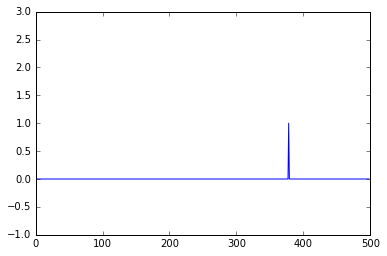

In [91]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
num_gaps = []
for pos in range(aln.get_alignment_length()):
    letters = Counter(aln[:, pos])
    num_gaps.append(letters['-'])
plt.plot(num_gaps)
plt.ylim(-1, 3)

In [77]:
def last_element_index(li, el):
    """
    li: list
    el: element
    
    returns index of first occurrence of el in li.
    """
    idx = 0
    for i, l in enumerate(li):
        if l == el:
            idx = i
    return idx

In [78]:
last_element_index(num_gaps, 0.0)

775

In [79]:
start = num_gaps.index(0)
end = last_element_index(num_gaps, 0)
start, end

(46, 775)

In [86]:
aln = aln[:, start:end]

distance(str(aln[0].seq), str(aln[3].seq))

178

In [87]:
distance(str(aln[1].seq), str(aln[3].seq))

108

In [88]:
distance(str(aln[2].seq), str(aln[3].seq))

56

In [89]:
str(aln[2].seq)

'CAAATGAGAGACGTACTTGGGACATTTGACACTGCCCAGATAATAAAGCTTCTCCCTTTTGCAGCTGCTCCACCGAAGCAAAGCAGAATGCAGTTCTCTTCACTGACTGTGAATGTGAGGGGATCAGGGATGAGAATACTTGTAAGGGGCAATTCTCCTGTATTCAACTACAACAAAACCACTAAAAGGCTAACAATTCTCGGAAAAGATGCCGGCACTTTAATTGAAGACCCANATGAAAGCACATCAGGAGTGGAGTCCGCCGTCTTGAGAGGGTTCCTCATTATAGGTAAGGAAGACAGAANATACGGACCANCATTAANCATCAATGAACTGAGTAACCTTGCAAAAGGGGAAAAGGNTAATGTGCTAATCGGGCANGGAGACGTGNTGTTGGTAATGANACNTAAANCGGGACTCTAGCATACTNTNGTGACACTCACACAGCNACGNGNATNANTNNAGATNNNNCATNNANNNAAATCNNGNNNNCCTCNTA'

In [92]:
str(aln[3].seq)

'CAAATGAGAGACGTACTTGGGACATTTGACACTGCCCAGATAATAAAGCTTCTCCCTTTTGCAGCTGCTCCACCGAAGCAAAGCAGAATGCAGTTCTCTTCACTGACTGTGAATGTGAGGGGATCAGGGATGAGAATACTTGTAAGGGGCAATTCTCCTGTATTCAACTACAACAAAACCACTAAAAGGCTAACAATTCTCGGAAAAGATGCCGGCACTTTAATTGAAGACCCAGATGAAAGCACATCAGGAGTGGAGTCCGCCGTCTTGAGAGGGTTCCTCATTATAGGTAAGGAAGACAGAAGATACGGACCAGCATTAAGCATCAATGAACTGAGTAACCTTGCAAAAGGGGAAAAGGCTAATGTGCTAATCGGGCAAGGAGACGTGGTGTTGGTAATGAAACGAAAACGGGACTCTAGCATACTTACTGACAGCCAGACAGCGACCAAAAGAATTCGGATGGCCATCAATTAATGCTGAATAGTTTAAAAACGAC'